<a href="https://colab.research.google.com/github/ezio341/PCVK_Genap_20-21/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


transform Linier brightness

change brightness
-----------------
Input Brightness Value: 40


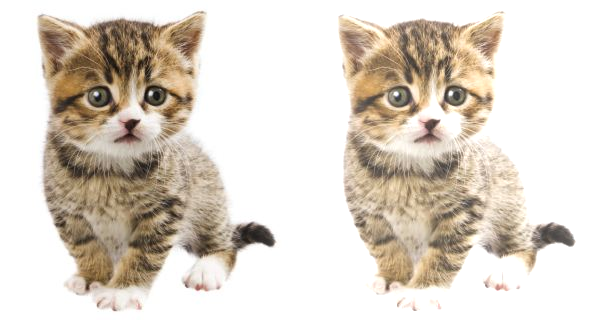

In [ ]:
print('change brightness')
print('-----------------')
try:
  brightness = int(input('Input Brightness Value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kitten-sm.jpg')
brightness_image  = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0,255)

# simple cv brightness
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Change contrast and brightness

change brightness and contrast
-----------------
Input Brightness Value [-255 - 255]: -20
Input contrast Value [1.0 - 3.0]: 1.3


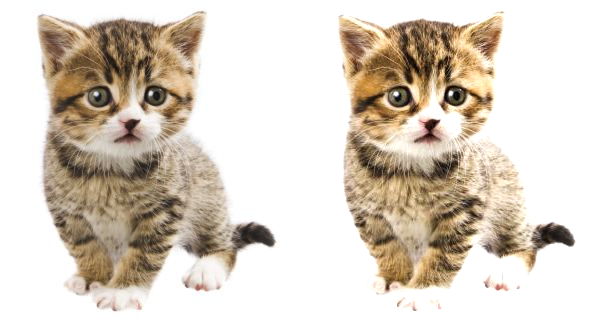

In [ ]:
print('change brightness and contrast')
print('-----------------')
try:
  brightness = int(input('Input Brightness Value [-255 - 255]: '))
  contrast = float(input('Input contrast Value [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kitten-sm.jpg')
brightnessncontrast_image  = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # multiply contrast with channel 
      brightnessncontrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0,255)

final_frame = cv.hconcat((original, brightnessncontrast_image))
cv2_imshow(final_frame)

Change brightness level using logarithmic transformation

Add brightness value: 40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


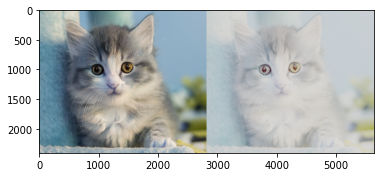

In [ ]:
# read image
image = cv.imread('/content/drive/MyDrive/Kitten1.jpg')

# log transform
c = int(input('Add brightness value: '))
log_img = c * np.log(image + 1)

# convert float to int
log_img = np.array(log_img, dtype=np.uint8)

final_frame = cv.hconcat((image, log_img))
plt.imshow(final_frame)

Grayscale Averaging, Lightness, Luminance

1. Grayscale Average


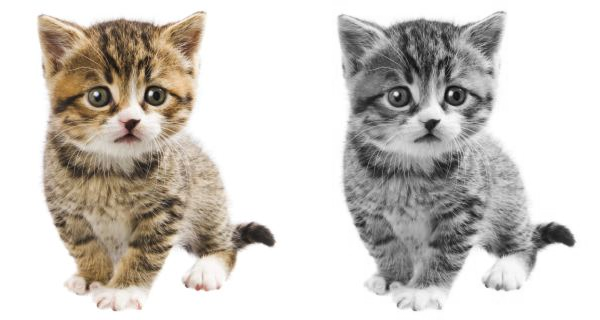

2. Grayscale Lightness


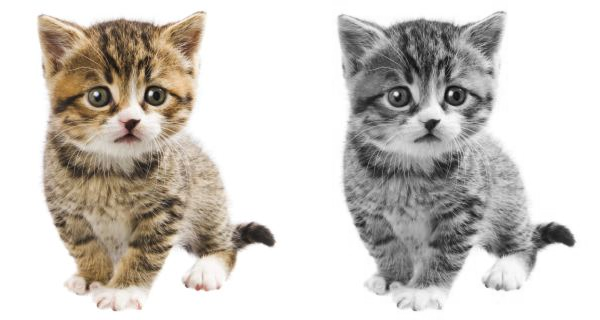

3. Grayscale Luminance


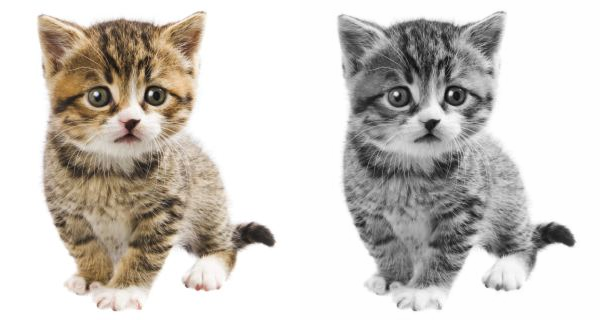

In [ ]:
original = cv.imread('/content/drive/MyDrive/Kitten-sm.jpg')

grayavgimg  = np.zeros(original.shape, original.dtype)
grayligimg  = np.zeros(original.shape, original.dtype)
graylumimg  = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    # gray average
    grayavgimg[y,x] = np.array(np.sum(original[y,x])/3)
    # gray lightness
    grayligimg[y,x] = np.array((np.max(original[y,x])/2)+(np.min(original[y,x])/2))
    # gray luminance
    r,g,b = original[y,x]
    graylumimg[y,x] = np.array((0.21*r)+(0.72*g)+(0.07*b))

print('1. Grayscale Average')
final_frame1 = cv.hconcat((original, grayavgimg))
cv2_imshow(final_frame1)
print('2. Grayscale Lightness')
final_frame2 = cv.hconcat((original, grayligimg))
cv2_imshow(final_frame2)
print('3. Grayscale Luminance')
final_frame2 = cv.hconcat((original, graylumimg))
cv2_imshow(final_frame2)

display a certain color in image

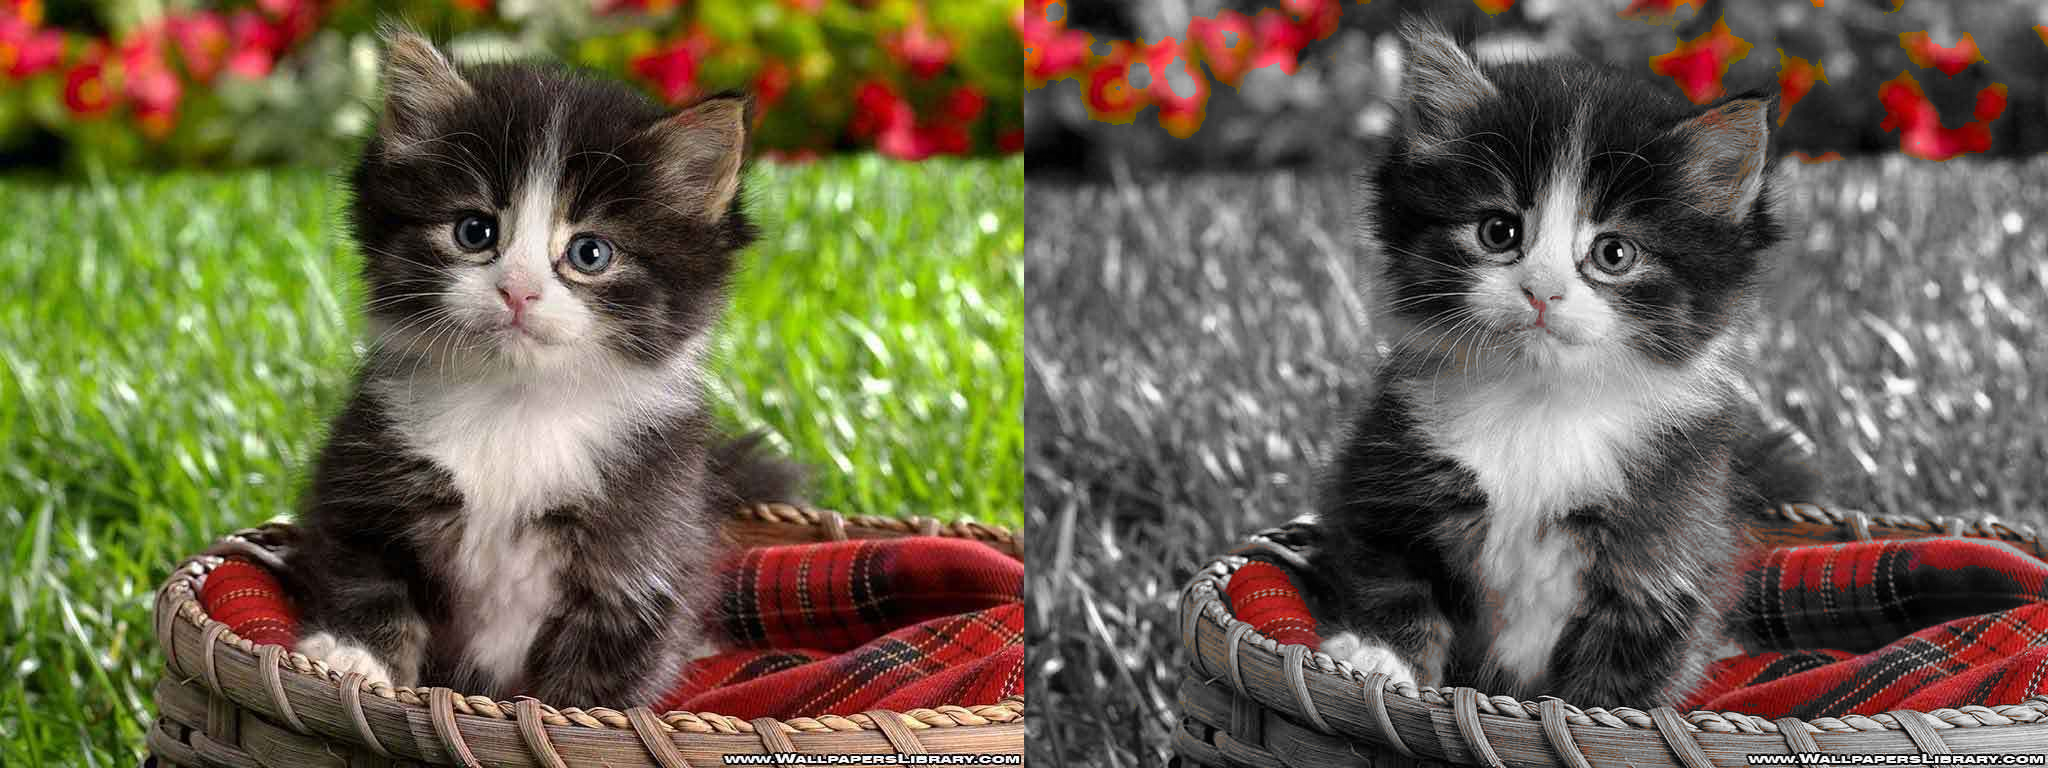

In [36]:
original = cv.imread('/content/drive/MyDrive/Kitten-cl.jpg')

climg = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    # display color if red channel more than 100 and green channel less than 100 
    if original[y,x,2] >=100 and original[y,x,1]<100:
      climg[y,x] = original[y,x]
    else:
      # gray average
      climg[y,x] = np.array(np.sum(original[y,x])/3)

final_frame = cv.hconcat((original, climg))
cv2_imshow(final_frame)